### IMPORT  DATASET

In [31]:
#from sklearn import datasets
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt

#iris = datasets.load_iris()
type(iris) # es una especie de diccionario de formato sklearn
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
iris.data.shape

(150, 4)

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### SKLEARN requiere FEATURES (X) and TARGET(y) en diferentes arrays o dataframes para trabajar. Tambien requier variables predictoras numericas y que no haya missings en el dataset

In [93]:
# Create feature and target arrays
X = iris.data
y = iris.target
type(y)

# Otro ejemplo, a partir de un csv creamos features and target DISTINC  arrays. Para ello, usamos el values atribute
#importamos base boston
#X = boston.drop('MEDV', axis=1).values ### MEDV es la variable target(precio de las casas).La eliminamos de las features
#y = boston['MEDV'].values
#X.shape

numpy.ndarray

### CLASSIFICATION > VAR TARGET DISCRETA

#### TRAIN AND TEST SPLIT DATA. knn CLASSIFYIER TRAINING MODEL. PREDICT TEST DATA. MEASURING THE MODEL PERFORMANCE USING TEST DATA

##### (dividimos la data, armamos el clasificador knn, entrenamos el modelo con la training data, predecimos c la test data y medimos accuracy usando el score method, usando x_test e y_test)

In [89]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split


# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

### random_state>It doesn't matter if it is 0 or 1 or any other integer. What matters is that it should be set the same value, if you want to validate your processing over multiple runs of the code. By the way I have seen random_state=42 used in many official examples of scikit as well as elsewhere also.
#### is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels for the training data X: y_pred
y_pred = knn.predict(X_test)
print("Prediction: {}".format(y_pred)) 
# Print the accuracy
print(knn.score(X_test, y_test))

Prediction: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 1 0 2 1 2 2 1 1 0 2 0]
0.9666666666666667


#### MODEL COMPLEXY
#### K mas grande, limites de clasificacion mas suave, modelo menos complejos > puede generar underfitting
#### K mas chico, limites de clasificacion menos suave, modelo mas complejos> puede generar overfitting
#### Deberiamos encontrar un K entre medio para evitar estos problemas

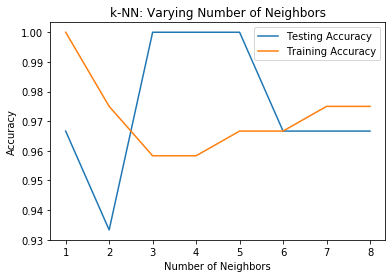

In [91]:
import matplotlib.pyplot as plt

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### REGRESSION > VAR TARGET CONTINUA

#### SKLEARN requiere FEATURES (X) and TARGET(y) en diferentes arrays o dataframes para trabajar. Tambien requier variables predictoras numericas y que no haya missings en el dataset

In [96]:
# import dataset boston
#url = https://www.gapminder.org/data/
# Create feature and target DISTINC arrays. Para ello, usamos el values atribute
X = boston.drop('MEDV', axis=1).values ### MEDV es la variable target(precio de las casas).La eliminamos de las features
y = boston['MEDV'].values
X.shape

NameError: name 'boston' is not defined

#### Para poder estimar, debemos encontrar los parametros a y b(y=ax+b) utilizando la loss function (la cual minimiza el error). Es llamada OLS, ordinary least squares. Si utilizamos mas features, la ecuacion se trasnforma  y = a1x1+a2x2+...anxn+b. Los pasos entonces son los siguientes> dividir el dataset en features y target, luego en training data y test data. Entrenar el modelo (FIT), predecir y medir la performance con el R cuadrado. Tambien, debemos hacer una cross validation para combatir la dependencia del R2 de realizar un split arbitrario de la data. Tambien, vamos a regulizar(ajustar con un alpha) la regresion (linear regresson minimizes a loss function and  It chooses a coeficient for each feature variable. But Large coefficientes can lead to overfitting.  To penalize large coefficients, corregimos la OLS loss function > Ridge regression y Lasso regressio). Ese alpha, al igual que el knn de clasificacion, sirve para controlar la complejidad del modelo( Alpha > 0 overfitting, alpah > alto underfitting). Lasso regression es util para la seleccion de las features!

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

In [ ]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

#### que tan bueno es el modelo? CLASSIFICATION

In [108]:
#url= https://www.kaggle.com/uciml/pima-indians-diabetes-database
df= pd.read_csv(r'C:\Users\Mumes\Desktop\diabetes.csv')
df.head()
# Create feature and target DISTINC arrays. Para ello, usamos el values atribute
X = df.drop('Outcome', axis=1).values ### Outcome es la variable target(precio de las casas).La eliminamos de las features
y = df['Outcome'].values
X.shape

(768, 8)

In [109]:

# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



### LOG REGRESSION & ROC CURVE > FOR CLASSIFICATION PROBLEMS!

In [142]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(max_iter=2000)

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Scores
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7717391304347826
0.7597402597402597
[[168  38]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.65      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



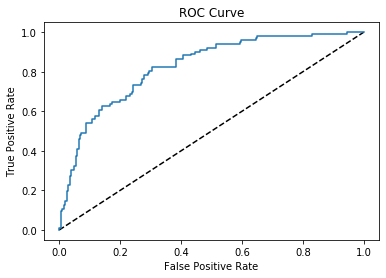

In [112]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [117]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8242908814011042
AUC scores computed using 5-fold cross-validation: [0.81240741 0.80777778 0.82555556 0.87283019 0.84471698]


#### HYPERPARAMETER TUNING

In [115]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid > podemos hacerlo para alpha, k neighboars p en este caso para los param de la logistica
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(max_iter= 2000)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.7734742381801205


#### Use the .fit() method on the RandomizedSearchCV object to fit it to the data X and y

In [118]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 7}
Best score is 0.7448264154146507


### PREPROCESSING DATA

##### >>>DEALING WITH CATEGORICAL FEATURES > TRANSFORM TO DUMMIES ( SI DOS CATEGORIAS DE 3 SON CERO, ESO IMPLICA QUE LA TERCERA ES CIERTA, POR ESO SIEMBRE VAMOS A CREAR N -1 CATEGORIAS PARA LA VARIABLE, PARA NO DUPLICAR INFO)
##### EN SK LEARN ONEHOTENCODER(), EN PANDAS GET_DUMMIES()

In [ ]:
# Import gapminder.csv
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Drop 'Region_America' from df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

#### >>>MISSING DATA

In [121]:
#import data set
df= pd.read_csv(r'C:\Users\Mumes\Desktop\house-votes-84.csv')

# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

republican      0
n              12
y              48
n.1            11
y.1            11
y.2            15
y.3            11
n.2            14
n.3            15
n.4            22
y.4             7
?              20
y.5            31
y.6            25
y.7            17
n.5            28
y.8           104
dtype: int64
Shape of Original DataFrame: (434, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


In [128]:
# Import the Imputer module
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values=0, strategy='most_frequent')

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]


In [134]:
# Import necessary modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=0, strategy='most_frequent')),
        ('SVM', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.87      0.82       151
           1       0.68      0.50      0.58        80

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



#### >>> NORMALIZATION

In [ ]:
from sklearn.preprocessing import Normalizer
df= pd.read_csv(r'C:\Users\Mumes\Desktop\wine_white.csv')
x_array = np_xarray(df['column1'])
normalized_X= preprocessing.normalize([x_array])

#### >>> CENTERING AND SCALING

In [135]:
#import data set
df= pd.read_csv(r'C:\Users\Mumes\Desktop\wine_white.csv')
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 44.98579117838542
Standard Deviation of Unscaled Features: 58.37297131925462
Mean of Scaled Features: 8.86154575644819e-17
Standard Deviation of Scaled Features: 1.0


In [136]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))


Accuracy with Scaling: 0.7012987012987013
Accuracy without Scaling: 0.6883116883116883


In [137]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        94
           1       0.78      0.52      0.62        60

    accuracy                           0.75       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.75      0.74       154

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}


#### OTHER CLASSIFIERS

#### SVM (linear SVC en scikit Learn) y no linear SVC

In [146]:
from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression(max_iter= 5000)
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC(max_iter= 5000)
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

1.0
0.96
0.9970304380103935
0.9888888888888889
